In [ ]:
import pandas as pd
from tqdm.notebook import tqdm
import multiprocessing
import parmap
import numpy as np
import collections

In [2]:
refseq = pd.read_csv('/home/weber/PycharmProjects/ExoCarto/data/2_processed/DF_transformed.csv.gz', compression='gzip', sep='\t').dropna(subset=['HGNC']).sort_values(by=['HGNC', 'Chrom', 'Start'], ascending=True)
refseq['HGNC'] = refseq['HGNC'].astype(int)
refseq['Ratio_num'] = refseq['Ratio'].apply(eval)

multi_mrna_genes = refseq.loc[refseq['mRNA_nb'] > 1, 'HGNC'].unique()

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pext_refseq = pd.read_parquet('/home/weber/PycharmProjects/ExoCarto/data/clean/2_expression/RefSeq_PEXT.parquet')
pext_refseq['HGNC ID'] = pext_refseq['HGNC ID'].astype(int)
pext_refseq = pext_refseq.loc[pext_refseq['HGNC ID'].isin(multi_mrna_genes)]
pext_refseq = pd.merge(pext_refseq, refseq[['HGNC', 'ranges', 'Ratio_num']], left_on=['HGNC ID', 'Exon'], right_on=['HGNC', 'ranges'])
pext_refseq

,HGNC ID,symbol,ensg,Exon,Adipose_Subcutaneous,Adipose_Visceral_Omentum_,AdrenalGland,Artery_Aorta,Artery_Coronary,Artery_Tibial,...,Stomach,Testis,Thyroid,Uterus,Vagina,WholeBlood,mean_proportion,HGNC,ranges,Ratio_num
0,1109,BRI3,ENSG00000164713,97911108-97911249,0.58244,0.58290,0.62426,0.61856,0.59839,0.59585,...,0.56897,0.489850,0.59181,0.61988,0.61228,0.54971,0.581680,1109,97911108-97911249,1.000000
1,1109,BRI3,ENSG00000164713,97911663-97911765,0.58244,0.58290,0.62426,0.61856,0.59839,0.59585,...,0.56897,0.489850,0.59181,0.61988,0.61228,0.54971,0.581680,1109,97911663-97911765,1.000000
2,1109,BRI3,ENSG00000164713,97920423-97920555,0.58244,0.58290,0.62426,0.61856,0.59839,0.59585,...,0.56897,0.489850,0.59181,0.61988,0.61228,0.54971,0.581680,1109,97920423-97920555,0.500000
3,1109,BRI3,ENSG00000164713,97921951-97922002,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,1109,97921951-97922002,0.500000
4,3815,FOXI1,ENSG00000168269,169532962-169533535,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,3815,169532962-169533535,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256123,29197,CCSER2,ENSG00000107771,86259631-86259715,0.66182,0.63653,0.68397,0.59614,0.64098,0.64226,...,0.66667,0.033532,0.51133,0.62554,0.56584,0.50833,0.668990,29197,86259631-86259715,0.571429
256124,29197,CCSER2,ENSG00000107771,86259715-86259763,0.66182,0.63653,0.68397,0.59614,0.64098,0.64226,...,0.66667,0.033532,0.51133,0.62554,0.56584,0.50833,0.668990,29197,86259715-86259763,0.142857
256125,29197,CCSER2,ENSG00000107771,86273205-86273268,0.66182,0.63653,0.68397,0.59614,0.64098,0.64226,...,0.66667,0.034523,0.51133,0.62554,0.56584,0.50833,0.672050,29197,86273205-86273268,0.857143
256126,29197,CCSER2,ENSG00000107771,86273268-86273299,0.66182,0.63653,0.68397,0.59614,0.64098,0.64226,...,0.66667,0.034523,0.51133,0.62554,0.56584,0.50833,0.672050,29197,86273268-86273299,0.571429


# Nombre de gènes et d'exons avec >= 1 exon avec représentation moyenne < 10% tout tissus confondus

In [41]:
print(pext_refseq.loc[pext_refseq['mean_proportion'] < 0.1, 'symbol'].nunique(), pext_refseq.loc[pext_refseq['mean_proportion'] < 0.1, 'Exon'].nunique())

3856 10464


In [ ]:
# Nombre de gènes et d'exons avec >= 1 exon présent dans < 50% des isoformes du gène

In [42]:
print(pext_refseq.loc[pext_refseq['Ratio_num'] < 0.5, 'symbol'].nunique(), pext_refseq.loc[pext_refseq['Ratio_num'] < 0.5, 'Exon'].nunique())

4504 13244


In [ ]:
# Nombre de gènes et d'exons avec >= 1 exon présent dans < 50% des isoformes du gène & avec >= 1 exon avec représentation moyenne < 10% tout tissus confondus

In [43]:
print(pext_refseq.loc[(pext_refseq['Ratio_num'] < 0.5) & (pext_refseq['mean_proportion'] < 0.1), 'symbol'].nunique(), pext_refseq.loc[(pext_refseq['Ratio_num'] < 0.5) & (pext_refseq['mean_proportion'] < 0.1), 'Exon'].nunique())

2605 5099


In [44]:
pext_refseq.loc[(pext_refseq['Ratio_num'] < 0.5) & (pext_refseq['mean_proportion'] < 0.1)]

,HGNC ID,symbol,ensg,Exon,Adipose_Subcutaneous,Adipose_Visceral_Omentum_,AdrenalGland,Artery_Aorta,Artery_Coronary,Artery_Tibial,...,Stomach,Testis,Thyroid,Uterus,Vagina,WholeBlood,mean_proportion,HGNC,ranges,Ratio_num
41,1508,CASP7,ENSG00000165806,115451731-115451829,0.008511,0.005225,0.000000,0.000000,0.000000,0.000000,...,0.009635,0.000000,0.000000,0.000000,0.000000,0.00000,0.001972,1508,115451731-115451829,0.125000
44,1508,CASP7,ENSG00000165806,115469171-115469205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001736,1508,115469171-115469205,0.125000
50,1508,CASP7,ENSG00000165806,115485576-115485649,0.011264,0.031870,0.025790,0.000914,0.038462,0.000000,...,0.042553,0.048319,0.022837,0.044676,0.033153,0.00000,0.047041,1508,115485576-115485649,0.125000
80,735,ASAH1,ENSG00000104763,17930765-17930785,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,735,17930765-17930785,0.250000
203,5464,IGF1,ENSG00000017427,102872265-102872279,0.049074,0.080493,0.059420,0.098009,0.069736,0.052738,...,0.105260,0.062626,0.080463,0.084280,0.075269,0.00000,0.053564,5464,102872265-102872279,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256014,29191,LIMCH1,ENSG00000064042,41635565-41635825,0.002432,0.001694,0.002137,0.002983,0.003190,0.003789,...,0.000000,0.004337,0.002558,0.003752,0.002945,0.00000,0.012117,29191,41635565-41635825,0.050000
256023,29191,LIMCH1,ENSG00000064042,41672735-41672809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017789,0.000000,0.063307,0.000000,0.020619,0.00000,0.008168,29191,41672735-41672809,0.100000
256101,29196,SLC45A4,ENSG00000022567,142221541-142221671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004880,0.000000,0.000000,0.000000,0.00391,0.000208,29196,142221541-142221671,0.333333
256115,29197,CCSER2,ENSG00000107771,86133571-86133661,0.019662,0.032229,0.015492,0.009392,0.009786,0.007561,...,0.012821,0.002603,0.012465,0.016119,0.024005,0.03750,0.018681,29197,86133571-86133661,0.142857


In [14]:
rare_exons = pext_refseq.loc[(pext_refseq['Ratio_num'] <= 0.5), 'Exon']

In [15]:
pext_refseq_filtered = pext_refseq.loc[(pext_refseq['Exon'].isin(rare_exons.values)) & (pext_refseq['mean_proportion'] < 0.1)].reset_index(drop=True)
pext_refseq_filtered

,HGNC ID,symbol,ensg,Exon,Adipose_Subcutaneous,Adipose_Visceral_Omentum_,AdrenalGland,Artery_Aorta,Artery_Coronary,Artery_Tibial,...,Stomach,Testis,Thyroid,Uterus,Vagina,WholeBlood,mean_proportion,HGNC,ranges,Ratio_num
0,1109,BRI3,ENSG00000164713,97921951-97922002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1109,97921951-97922002,0.500000
1,1508,CASP7,ENSG00000165806,115451731-115451829,0.008511,0.005225,0.000000,0.000000,0.000000,0.000000,...,0.009635,0.000000,0.000000,0.000000,0.000000,0.00000,0.001972,1508,115451731-115451829,0.125000
2,1508,CASP7,ENSG00000165806,115469171-115469205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001736,1508,115469171-115469205,0.125000
3,1508,CASP7,ENSG00000165806,115485576-115485649,0.011264,0.031870,0.025790,0.000914,0.038462,0.000000,...,0.042553,0.048319,0.022837,0.044676,0.033153,0.00000,0.047041,1508,115485576-115485649,0.125000
4,735,ASAH1,ENSG00000104763,17930765-17930785,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,735,17930765-17930785,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11357,29193,IQSEC3,ENSG00000120645,280413-280487,0.000000,0.017893,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.017065,0.000000,0.000000,0.000000,0.00000,0.011945,29193,280413-280487,0.500000
11358,29193,IQSEC3,ENSG00000120645,280413-280487,0.000000,0.017893,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.017065,0.000000,0.000000,0.000000,0.00000,0.011945,29193,280413-280487,0.500000
11359,29196,SLC45A4,ENSG00000022567,142221541-142221671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004880,0.000000,0.000000,0.000000,0.00391,0.000208,29196,142221541-142221671,0.333333
11360,29197,CCSER2,ENSG00000107771,86133571-86133661,0.019662,0.032229,0.015492,0.009392,0.009786,0.007561,...,0.012821,0.002603,0.012465,0.016119,0.024005,0.03750,0.018681,29197,86133571-86133661,0.142857


In [16]:
# pext_refseq_filtered = pext_refseq_filtered.set_index(['HGNC ID', 'symbol', 'ensg', 'Exon'])
def mp_pext_search_exon_of_intereset(gene, l):
    gene_df = pext_refseq_filtered.loc[pext_refseq_filtered['HGNC ID'] == gene]
    for (j, exon), (i, row) in zip(gene_df[gene_df.columns[:4]].iterrows(), gene_df[gene_df.columns[4:-4]].iterrows()):
        row_ranked = row.rank(pct=True)
        tmp_gene_df = pd.concat([row, row > 0.1, row_ranked, row_ranked > 0.95], axis=1)
        tmp_gene_df.columns = ['PEXT_value', 'check_pext', 'PEXT_pct', 'check_95pct']
        tmp_gene_df.loc[(tmp_gene_df['check_pext'] == True) & (tmp_gene_df['check_95pct'] == True), 'final_check'] = True
        tmp_gene_df['final_check'].fillna(False, inplace=True)
        tmp_gene_df = tmp_gene_df.T.reset_index().rename({'index' : 'variable'}, axis=1)
        for exon_row, col in zip(exon, gene_df.columns[:4]):
            tmp_gene_df[col] = exon_row
        tmp_gene_df = tmp_gene_df[list(tmp_gene_df.columns[-4:]) + list(tmp_gene_df.columns[:-4])]
        l.append(tmp_gene_df)

m = multiprocessing.Manager()
l = m.list()
parmap.starmap(mp_pext_search_exon_of_intereset, list(zip(pext_refseq_filtered['HGNC ID'].unique())), l, pm_pbar=True, pm_processes=22)

concat_df = pd.concat(l, axis=0).reset_index(drop=True)
concat_df['check_exon'] = concat_df.loc[concat_df['variable'] == 'final_check'].apply(lambda r: True if True in list(r[5:]) else False, axis=1)
concat_df = concat_df.reset_index(drop=True)
concat_df.to_parquet('/home/weber/PycharmProjects/ExoCarto/data/clean/2_expression/RefSeq_PEXT_ranking.parquet', index=False)
concat_df
    

3696it [00:21, 173.67it/s]                          


ArrowInvalid: ('Could not convert 0.020086 with type float: tried to convert to boolean', 'Conversion failed for column Adipose_Subcutaneous with type object')

In [2]:
concat_df = pd.read_parquet('/home/weber/PycharmProjects/ExoCarto/data/clean/2_expression/RefSeq_PEXT_ranking.parquet')
concat_df

,HGNC ID,symbol,ensg,Exon,variable,Adipose_Subcutaneous,Adipose_Visceral_Omentum_,AdrenalGland,Artery_Aorta,Artery_Coronary,...,Skin_SunExposed_Lowerleg_,SmallIntestine_TerminalIleum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,WholeBlood,check_exon
0,1940,CHM,ENSG00000188419,85226572-85226590,PEXT_value,0.039516,0.077364,0.040857,0.049682,0.052434,...,0.031683,0.053279,0.054323,0.043069,0.136250,0.057512,0.043043,0.058187,0.051948,None
1,1940,CHM,ENSG00000188419,85226572-85226590,check_pext,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,None
2,1940,CHM,ENSG00000188419,85226572-85226590,PEXT_pct,0.288462,0.961538,0.423077,0.653846,0.711538,...,0.173077,0.750000,0.769231,0.500000,1.000000,0.826923,0.480769,0.846154,0.692308,None
3,1940,CHM,ENSG00000188419,85226572-85226590,check_95pct,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,None
4,1940,CHM,ENSG00000188419,85226572-85226590,final_check,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25500,8538,P2RX6,ENSG00000099957,21369549-21369627,PEXT_value,0.029661,0.000000,0.077922,0.000000,0.000000,...,0.000000,0.000000,0.066125,0.000000,0.154390,0.000000,0.000000,0.000000,0.000000,None
25501,8538,P2RX6,ENSG00000099957,21369549-21369627,check_pext,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,None
25502,8538,P2RX6,ENSG00000099957,21369549-21369627,PEXT_pct,0.519231,0.259615,0.673077,0.259615,0.259615,...,0.259615,0.259615,0.615385,0.259615,0.884615,0.259615,0.259615,0.259615,0.259615,None
25503,8538,P2RX6,ENSG00000099957,21369549-21369627,check_95pct,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None


In [9]:
refseq_x_vcf = pd.read_parquet('/home/weber/PycharmProjects/ExoCarto/data/2_processed/refseq_vcf_pext_phylocsf.parquet')
disease_genes = refseq_x_vcf['HGNC ID'].unique()

In [12]:
refseq_x_vcf

,CCRS_Gene,RefSeq_CDS_representation,RefSeq_Chrom,RefSeq_Count_CDS_alternative,RefSeq_Count_CDS_constitutive,RefSeq_End,RefSeq_GeneID,RefSeq_HGNC,RefSeq_Length,RefSeq_Ratio,...,Brain_Putamen_basalganglia_,Brain_Caudate_basalganglia_,Colon_Sigmoid,Cervix_Endocervix,Ovary,Esophagus_GastroesophagealJunction,Testis,Brain_Amygdala,mean_proportion,phyloCSF_max_score
0,ARL6IP6,Unique,2,3,3,153575538,151188,24048,399,0.666667,...,0.44051,0.47770,0.34606,0.41742,0.42508,0.37475,0.41173,0.45336,0.40263,1500.8338
1,ARL6IP6,Unique,2,3,3,153576010,151188,24048,111,0.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARL6IP6,Unique,2,3,3,153577100,151188,24048,53,1.000000,...,0.44051,0.47770,0.34606,0.41742,0.42508,0.37475,0.41173,0.45336,0.40263,18.1583
3,ARL6IP6,Variable_region,2,3,3,153591601,151188,24048,93,0.666667,...,0.44051,0.47770,0.34606,0.41742,0.42508,0.37475,0.41173,0.45336,0.40263,259.6829
4,ARL6IP6,Variable_region,2,3,3,153591640,151188,24048,39,1.000000,...,0.44051,0.47770,0.34606,0.41742,0.42508,0.37475,0.41173,0.45336,0.40263,259.6829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,TCTN2,Unique,12,1,18,124189235,79867,25774,156,1.000000,...,0.93276,0.91308,0.89028,0.78037,0.86630,0.89267,0.90717,0.92818,0.88564,494.8472
16,TCTN2,Unique,12,1,18,124191398,79867,25774,125,1.000000,...,0.93276,0.91308,0.89028,0.78037,0.86630,0.89267,0.90717,0.92818,0.88564,723.7322
17,TCTN2,Unique,12,1,18,124191398,79867,25774,125,1.000000,...,0.93276,0.91308,0.89028,0.78037,0.86630,0.89267,0.90717,0.92818,0.88564,723.7322
18,TCTN2,Unique,12,1,18,124191620,79867,25774,88,1.000000,...,0.93276,0.91308,0.89028,0.78037,0.86630,0.89267,0.90717,0.92818,0.88564,389.6992


In [17]:
gene_ok = concat_df.loc[concat_df['check_exon'] == True, 'HGNC ID'].unique()
len(set(disease_genes).intersection(set(gene_ok)))


593

In [18]:
len(gene_ok)

2076

In [28]:
[e for e in list(gene_ok) if 'BBS' in e]

[]

In [6]:
exon_ok = concat_df.loc[concat_df['check_exon'] == True, 'Exon'].unique()
len(exon_ok)

2526

In [48]:
concat_df.symbol.nunique()

2607

(0.0, 15.0)

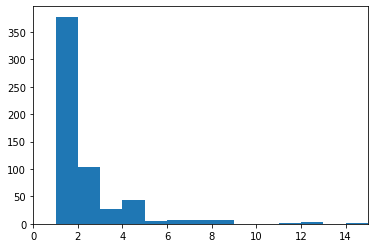

In [24]:
import matplotlib.pyplot as plt

bins = np.arange(0,50,1)
plt.hist(dict(collections.Counter([e for e in concat_df.loc[concat_df['check_exon'] == True, 'HGNC ID'].values if e in disease_genes])).values(), bins=bins)
plt.xlim(0,15)

In [26]:
from scipy import stats
stats.describe(list(dict(collections.Counter([e for e in concat_df.loc[concat_df['check_exon'] == True, 'HGNC ID'].values if e not in disease_genes])).values()))

DescribeResult(nobs=1483, minmax=(1, 200), mean=2.8718813216453136, variance=101.68397938671566, skewness=12.415933921594602, kurtosis=180.65067770900612)

In [31]:
hpo = pd.read_parquet('/home/weber/PycharmProjects/ExoCarto/data/2_processed/RefSeq_HPO.parquet')
hpo

,CCRS_Gene,RefSeq_HGNC,RefSeq_Chrom,RefSeq_ranges,RefSeq_Start,RefSeq_End,HPO_POSITION,HPO_ontology_accessions,HPO_groupped
1,AMACR,451,5,33988413-33988466,33988413,33988466,33988445,HP:0000007,None
2,AMACR,451,5,33988413-33988466,33988413,33988466,33988445,HP:0000505,Abnormality of the eye
3,AMACR,451,5,33988413-33988466,33988413,33988466,33988445,HP:0000580,Abnormality of the eye
4,AMACR,451,5,33988413-33988466,33988413,33988466,33988445,HP:0001251,Abnormality of the nervous system
5,AMACR,451,5,33988413-33988466,33988413,33988466,33988445,HP:0001257,Abnormality of the musculature
...,...,...,...,...,...,...,...,...,...
1307127,TCTN2,25774,12,124192151-124192260,124192151,124192260,124192207,HP:0011220,Abnormality of head or neck
1307128,TCTN2,25774,12,124192151-124192260,124192151,124192260,124192207,HP:0011933,Abnormality of the nervous system
1307129,TCTN2,25774,12,124192151-124192260,124192151,124192260,124192207,HP:0100543,Abnormality of the nervous system
1307130,TCTN2,25774,12,124192151-124192260,124192151,124192260,124192207,HP:0100951,Abnormality of the nervous system


In [32]:
hpo_pext_selected = pd.merge(concat_df.loc[concat_df['Exon'].isin(exon_ok)], hpo, left_on=['HGNC ID', 'Exon'], right_on=['RefSeq_HGNC', 'RefSeq_ranges']).sort_values(['symbol', 'Exon', 'variable'])
hpo_pext_selected

NameError: name 'exon_ok' is not defined

In [39]:
hpo_pext_selected['PEXT_spec_tissus'] = hpo_pext_selected.loc[hpo_pext_selected['variable'] == 'final_check'].apply(lambda r: [hpo_pext_selected.columns[j+5] for j, col in enumerate(r[5:-11]) if col == 1 ], axis=1)
hpo_pext_selected

,HGNC ID,symbol,ensg,Exon,variable,Adipose_Subcutaneous,Adipose_Visceral_Omentum_,AdrenalGland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Bladder,Brain_Amygdala,Brain_Anteriorcingulatecortex_BA24_,Brain_Caudate_basalganglia_,Brain_CerebellarHemisphere,Brain_Cerebellum,Brain_Cortex,Brain_FrontalCortex_BA9_,Brain_Hippocampus,Brain_Hypothalamus,Brain_Nucleusaccumbens_basalganglia_,Brain_Putamen_basalganglia_,Brain_Spinalcord_cervicalc_1_,Brain_Substantianigra,Breast_MammaryTissue,Cells_EBV_transformedlymphocytes,Cervix_Ectocervix,Cervix_Endocervix,Colon_Sigmoid,Colon_Transverse,Esophagus_GastroesophagealJunction,Esophagus_Mucosa,Esophagus_Muscularis,FallopianTube,Heart_AtrialAppendage,Heart_LeftVentricle,Kidney_Cortex,Liver,Lung,MinorSalivaryGland,Muscle_Skeletal,Nerve_Tibial,Ovary,Pancreas,Pituitary,Prostate,Skin_NotSunExposed_Suprapubic_,Skin_SunExposed_Lowerleg_,SmallIntestine_TerminalIleum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,WholeBlood,check_exon,CCRS_Gene,RefSeq_HGNC,RefSeq_Chrom,RefSeq_ranges,RefSeq_Start,RefSeq_End,HPO_POSITION,HPO_ontology_accessions,HPO_groupped,PEXT_spec_tissus
46297,13743,ALOXE3,ENSG00000179148,8021308-8021621,PEXT_pct,0.459459,0.459459,NaN,NaN,NaN,NaN,0.459459,0.459459,0.459459,0.459459,1.0,0.972973,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,NaN,NaN,NaN,NaN,0.459459,NaN,0.459459,NaN,NaN,0.459459,NaN,0.459459,0.459459,NaN,NaN,0.459459,0.459459,0.459459,0.459459,0.945946,0.918919,0.459459,NaN,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,None,ALOXE3,13743,17,8021308-8021621,8021308,8021621,8021568,HP:0007431,Abnormality of the integument,NaN
46298,13743,ALOXE3,ENSG00000179148,8021308-8021621,PEXT_pct,0.459459,0.459459,NaN,NaN,NaN,NaN,0.459459,0.459459,0.459459,0.459459,1.0,0.972973,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,NaN,NaN,NaN,NaN,0.459459,NaN,0.459459,NaN,NaN,0.459459,NaN,0.459459,0.459459,NaN,NaN,0.459459,0.459459,0.459459,0.459459,0.945946,0.918919,0.459459,NaN,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,None,ALOXE3,13743,17,8021308-8021621,8021308,8021621,8021407,HP:0007431,Abnormality of the integument,NaN
46299,13743,ALOXE3,ENSG00000179148,8021308-8021621,PEXT_pct,0.459459,0.459459,NaN,NaN,NaN,NaN,0.459459,0.459459,0.459459,0.459459,1.0,0.972973,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,NaN,NaN,NaN,NaN,0.459459,NaN,0.459459,NaN,NaN,0.459459,NaN,0.459459,0.459459,NaN,NaN,0.459459,0.459459,0.459459,0.459459,0.945946,0.918919,0.459459,NaN,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,None,ALOXE3,13743,17,8021308-8021621,8021308,8021621,8021603,HP:0007431,Abnormality of the integument,NaN
46300,13743,ALOXE3,ENSG00000179148,8021308-8021621,PEXT_pct,0.459459,0.459459,NaN,NaN,NaN,NaN,0.459459,0.459459,0.459459,0.459459,1.0,0.972973,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,NaN,NaN,NaN,NaN,0.459459,NaN,0.459459,NaN,NaN,0.459459,NaN,0.459459,0.459459,NaN,NaN,0.459459,0.459459,0.459459,0.459459,0.945946,0.918919,0.459459,NaN,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,None,ALOXE3,13743,17,8021308-8021621,8021308,8021621,8021612,HP:0007431,Abnormality of the integument,NaN
46301,13743,ALOXE3,ENSG00000179148,8021308-8021621,PEXT_pct,0.459459,0.459459,NaN,NaN,NaN,NaN,0.459459,0.459459,0.459459,0.459459,1.0,0.972973,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,NaN,NaN,NaN,NaN,0.459459,NaN,0.459459,NaN,NaN,0.459459,NaN,0.459459,0.459459,NaN,NaN,0.459459,0.459459,0.459459,0.459459,0.945946,0.918919,0.459459,NaN,0.459459,0.459459,0.459459,0.459459,0.459459,0.459459,None,ALOXE3,13743,17,8021308-8021621,8021308,8021621,8021574,HP:0007431,Abnormality of the integument,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [102]:
hpo_pext_selected.Exon.nunique()

142

In [14]:
hpo_pext_selected.columns

Index(['HGNC ID', 'symbol', 'ensg', 'Exon', 'variable', 'Adipose_Subcutaneous',
       'Adipose_Visceral_Omentum_', 'AdrenalGland', 'Artery_Aorta',
       'Artery_Coronary', 'Artery_Tibial', 'Bladder', 'Brain_Amygdala',
       'Brain_Anteriorcingulatecortex_BA24_', 'Brain_Caudate_basalganglia_',
       'Brain_CerebellarHemisphere', 'Brain_Cerebellum', 'Brain_Cortex',
       'Brain_FrontalCortex_BA9_', 'Brain_Hippocampus', 'Brain_Hypothalamus',
       'Brain_Nucleusaccumbens_basalganglia_', 'Brain_Putamen_basalganglia_',
       'Brain_Spinalcord_cervicalc_1_', 'Brain_Substantianigra',
       'Breast_MammaryTissue', 'Cells_EBV_transformedlymphocytes',
       'Cervix_Ectocervix', 'Cervix_Endocervix', 'Colon_Sigmoid',
       'Colon_Transverse', 'Esophagus_GastroesophagealJunction',
       'Esophagus_Mucosa', 'Esophagus_Muscularis', 'FallopianTube',
       'Heart_AtrialAppendage', 'Heart_LeftVentricle', 'Kidney_Cortex',
       'Liver', 'Lung', 'MinorSalivaryGland', 'Muscle_Skeletal',
      

In [99]:
hpo_pext_selected.symbol.nunique()

58

In [40]:
hpo_pext_selected = hpo_pext_selected.loc[(hpo_pext_selected['variable'] == 'final_check')]
hpo_pext_selected.isna().sum()

HGNC ID                      0
symbol                       0
ensg                         0
Exon                         0
variable                     0
                          ... 
RefSeq_End                   0
HPO_POSITION                 0
HPO_ontology_accessions      0
HPO_groupped               557
PEXT_spec_tissus             0
Length: 68, dtype: int64

In [42]:
hpo_pext_selected['HPO_groupped'] = hpo_pext_selected['HPO_groupped'].fillna('None')

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
pd.options.display.max_columns = 70
hpo_pext_selected_lite = hpo_pext_selected[['HGNC ID', 'symbol', 'ensg', 'Exon', 'PEXT_spec_tissus', 'HPO_POSITION', 'HPO_ontology_accessions', 'HPO_groupped']]
hpo_pext_selected_lite
# hpo_pext_selected_gb = hpo_pext_selected_lite.groupby(['HGNC ID', 'symbol', 'ensg', 'Exon', ]).agg({'HPO_POSITION': ','.join, 'HPO_ontology_accessions': ','.join,  'HPO_groupped' : ','.join}).reset_index()
# merge = pd.merge(hpo_pext_selected_gb, hpo_pext_selected[['Exon', 'PEXT_spec_tissus']], on='Exon', how='left').sort_values(by=['symbol', 'Exon'])
# merge['PEXT_spec_tissus'] = merge['PEXT_spec_tissus'].astype(str)
# merge = merge.drop_duplicates()
# merge['HPO_POSITION'] = merge['HPO_POSITION'].apply(lambda r: set(r.split(',')))
# merge['HPO_ontology_accessions'] = merge['HPO_ontology_accessions'].apply(lambda r: set(r.split(',')))
# merge['HPO_groupped'] = merge['HPO_groupped'].apply(lambda r: ",".join([e for e in list(set(r.split(','))) if e != 'None']))
# merge.set_index(['HGNC ID', 'symbol', 'ensg', 'Exon'])
# merge.to_excel('/home/weber/PycharmProjects/ExoCarto/data/clean/3_phenotypes/RefSeq_PEXT_HPO.xlsx')
# 

,HGNC ID,symbol,ensg,Exon,PEXT_spec_tissus,HPO_POSITION,HPO_ontology_accessions,HPO_groupped
46309,13743,ALOXE3,ENSG00000179148,8021308-8021621,"[Brain_CerebellarHemisphere, Brain_Cerebellum]",8021568,HP:0007431,Abnormality of the integument
46310,13743,ALOXE3,ENSG00000179148,8021308-8021621,"[Brain_CerebellarHemisphere, Brain_Cerebellum]",8021407,HP:0007431,Abnormality of the integument
46311,13743,ALOXE3,ENSG00000179148,8021308-8021621,"[Brain_CerebellarHemisphere, Brain_Cerebellum]",8021603,HP:0007431,Abnormality of the integument
46312,13743,ALOXE3,ENSG00000179148,8021308-8021621,"[Brain_CerebellarHemisphere, Brain_Cerebellum]",8021612,HP:0007431,Abnormality of the integument
46313,13743,ALOXE3,ENSG00000179148,8021308-8021621,"[Brain_CerebellarHemisphere, Brain_Cerebellum]",8021574,HP:0007431,Abnormality of the integument
...,...,...,...,...,...,...,...,...
43075,12799,WWOX,ENSG00000186153,78312500-78312553,"[Cells_EBV_transformedlymphocytes, Testis]",78312531,HP:0001272,Abnormality of the nervous system
43076,12799,WWOX,ENSG00000186153,78312500-78312553,"[Cells_EBV_transformedlymphocytes, Testis]",78312531,HP:0001510,Growth abnormality
43077,12799,WWOX,ENSG00000186153,78312500-78312553,"[Cells_EBV_transformedlymphocytes, Testis]",78312531,HP:0002066,Abnormality of the nervous system
43078,12799,WWOX,ENSG00000186153,78312500-78312553,"[Cells_EBV_transformedlymphocytes, Testis]",78312531,HP:0002070,Abnormality of the nervous system


In [63]:
merge

,HGNC ID,symbol,ensg,Exon,HPO_POSITION,HPO_ontology_accessions,HPO_groupped,PEXT_spec_tissus
9237,13743,ALOXE3,ENSG00000179148,8021308-8021621,"{8021612, 8021608, 8021574, 8021603, 8021568, ...",{HP:0007431},Abnormality of the integument,"['Brain_CerebellarHemisphere', 'Brain_Cerebell..."
0,493,ANK2,ENSG00000145362,113970885-113970968,"{113970940, 113970964, 113970947}",{HP:0001657},Abnormality of the cardiovascular system,"['Brain_CerebellarHemisphere', 'Brain_Cerebell..."
3,493,ANK2,ENSG00000145362,114274201-114280455,"{114276763, 114280037, 114279053, 114278104, 1...","{HP:0001688, HP:0001279, HP:0001638, HP:001167...","Abnormality of the genitourinary system,Abnorm...","['Brain_CerebellarHemisphere', 'Brain_Cerebell..."
510,494,ANK3,ENSG00000151150,61828395-61836206,"{61830642, 61833170, 61832105, 61836174, 61830...","{HP:0002360, HP:0000752, HP:0001250, HP:000125...","Abnormality of the musculature,Abnormality of ...","['Brain_Anteriorcingulatecortex_BA24_', 'Brain..."
591,575,AP4S1,ENSG00000100478,31549790-31549850,"{31549838, 31549832}",{HP:0001258},Abnormality of the nervous system,"['MinorSalivaryGland', 'Pancreas']"
...,...,...,...,...,...,...,...,...
9137,12403,TTN,ENSG00000155657,179620949-179621524,"{179621349, 179621094, 179621369, 179621363, 1...",{HP:0001644},Abnormality of the cardiovascular system,"['Brain_Cortex', 'Brain_Hypothalamus', 'Brain_..."
9154,12403,TTN,ENSG00000155657,179622269-179622643,"{179622290, 179622569, 179622293, 179622513, 1...",{HP:0001644},Abnormality of the cardiovascular system,"['Brain_Caudate_basalganglia_', 'Brain_Hypotha..."
9170,12597,USH1C,ENSG00000006611,17526194-17526244,{17526211},{HP:0000365},Abnormality of the ear,"['Bladder', 'FallopianTube']"
9171,12597,USH1C,ENSG00000006611,17530903-17531385,{17531093},{HP:0000365},Abnormality of the ear,"['Bladder', 'FallopianTube']"


In [68]:
clinvar = pd.read_parquet('/home/weber/PycharmProjects/ExoCarto/data/2_processed/clinvar_20200905_lite_table.parquet')
clinvar['POS'] = clinvar['VAR_ID'].apply(lambda r: r.split('_')[1])
clinvar

,GENE,VAR_ID,MC,Status,Real_Status,RS_STARS,CLNREVSTAT,HPO,rs,POS
0,SAMD11,1_865628_G_A,missense_variant,Benign,Likely_benign,1,"criteria_provided,_single_submitter",[],41285790,865628
1,SAMD11,1_879375_C_T,nonsense,Pathogenic,Pathogenic,1,"criteria_provided,_single_submitter",[],None,879375
2,SAMD11,1_879481_G_C,missense_variant,Benign,Benign,1,"criteria_provided,_single_submitter",[],113383096,879481
3,NOC2L,1_880944_G_A,synonymous_variant,Benign,Benign,1,"criteria_provided,_single_submitter",[],112433394,880944
4,NOC2L,1_887409_G_C,synonymous_variant,Benign,Benign,1,"criteria_provided,_single_submitter",[],113226136,887409
...,...,...,...,...,...,...,...,...,...,...
322047,MT-CYB,MT_15860_A_G,missense_variant,Benign,Benign,1,"criteria_provided,_single_submitter",[],201023973,15860
322048,MT-CYB,MT_15860_A_T,missense_variant,Benign,Likely_benign,1,"criteria_provided,_single_submitter",[],201023973,15860
322049,MT-CYB,MT_15884_G_A,missense_variant,Benign,Benign,1,"criteria_provided,_single_submitter",[HP:0100615],527236195,15884
322050,MT-CYB,MT_15884_G_C,missense_variant,Benign,Benign,2,"criteria_provided,_multiple_submitters,_no_con...",[],527236195,15884


In [75]:
sorted(clinvar['Real_Status'].unique())

['Benign',
 'Benign,_association',
 'Benign,_drug_response',
 'Benign,_other',
 'Benign,_risk_factor',
 'Benign/Likely_benign',
 'Benign/Likely_benign,_other',
 'Benign/Likely_benign,_risk_factor',
 'Likely_benign',
 'Likely_benign,_drug_response',
 'Likely_benign,_drug_response,_other',
 'Likely_benign,_other',
 'Likely_pathogenic',
 'Likely_pathogenic,_Affects',
 'Likely_pathogenic,_association',
 'Likely_pathogenic,_drug_response',
 'Likely_pathogenic,_other',
 'Likely_pathogenic,_risk_factor',
 'Pathogenic',
 'Pathogenic,_Affects',
 'Pathogenic,_association',
 'Pathogenic,_association,_protective',
 'Pathogenic,_drug_response',
 'Pathogenic,_drug_response,_other',
 'Pathogenic,_other',
 'Pathogenic,_protective',
 'Pathogenic,_risk_factor',
 'Pathogenic/Likely_pathogenic',
 'Pathogenic/Likely_pathogenic,_drug_response',
 'Pathogenic/Likely_pathogenic,_other',
 'Pathogenic/Likely_pathogenic,_other,_risk_factor',
 'Pathogenic/Likely_pathogenic,_risk_factor']

In [85]:
merge_clinvar_hpo = pd.merge(hpo_pext_selected_lite, clinvar, left_on=['symbol', 'HPO_POSITION'], right_on=['GENE', 'POS'])
merge_clinvar_hpo.loc[merge_clinvar_hpo['Status'] == 'Pathogenic'].to_excel('/home/weber/PycharmProjects/ExoCarto/data/clean/3_phenotypes/clinvar_pext_HPO.xlsx', index=False)
merge_clinvar_hpo


,HGNC ID,symbol,ensg,Exon,PEXT_spec_tissus,HPO_POSITION,HPO_ontology_accessions,HPO_groupped,GENE,VAR_ID,MC,Status,Real_Status,RS_STARS,CLNREVSTAT,HPO,rs,POS
0,13743,ALOXE3,ENSG00000179148,8021308-8021621,"[Brain_CerebellarHemisphere, Brain_Cerebellum]",8021407,HP:0007431,Abnormality of the integument,ALOXE3,17_8021407_G_C,"missense_variant,SO:0001623",Benign,Benign,1,"criteria_provided,_single_submitter",[],112227180,8021407
1,13743,ALOXE3,ENSG00000179148,8021308-8021621,"[Brain_CerebellarHemisphere, Brain_Cerebellum]",8021612,HP:0007431,Abnormality of the integument,ALOXE3,17_8021612_C_A,"missense_variant,SO:0001623",Benign,Likely_benign,2,"criteria_provided,_multiple_submitters,_no_con...",[],79377087,8021612
2,13743,ALOXE3,ENSG00000179148,8021308-8021621,"[Brain_CerebellarHemisphere, Brain_Cerebellum]",8021608,HP:0007431,Abnormality of the integument,ALOXE3,17_8021608_G_C,"missense_variant,SO:0001623",Benign,Benign,1,"criteria_provided,_single_submitter",[],3027229,8021608
3,493,ANK2,ENSG00000145362,113970885-113970968,"[Brain_CerebellarHemisphere, Brain_Cerebellum]",113970947,HP:0001657,Abnormality of the cardiovascular system,ANK2,4_113970947_G_A,"synonymous_variant,SO:0001627",Benign,Likely_benign,1,"criteria_provided,_single_submitter",[],1060504155,113970947
4,493,ANK2,ENSG00000145362,114274201-114280455,"[Brain_CerebellarHemisphere, Brain_Cerebellum]",114276833,HP:0001657,Abnormality of the cardiovascular system,ANK2,4_114276833_A_G,"synonymous_variant,SO:0001627",Benign,Benign/Likely_benign,2,"criteria_provided,_multiple_submitters,_no_con...",[],145782226,114276833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369,12403,TTN,ENSG00000155657,179622269-179622643,"[Brain_Caudate_basalganglia_, Brain_Hypothalam...",179622489,HP:0001644,Abnormality of the cardiovascular system,TTN,2_179622489_C_T,"synonymous_variant,SO:0001627",Benign,Likely_benign,1,"criteria_provided,_single_submitter",[],759465333,179622489
4370,12403,TTN,ENSG00000155657,179622269-179622643,"[Brain_Caudate_basalganglia_, Brain_Hypothalam...",179622569,HP:0001644,Abnormality of the cardiovascular system,TTN,2_179622569_G_C,"missense_variant,SO:0001627",Benign,Benign/Likely_benign,2,"criteria_provided,_multiple_submitters,_no_con...",[],201735487,179622569
4371,12403,TTN,ENSG00000155657,179622269-179622643,"[Brain_Caudate_basalganglia_, Brain_Hypothalam...",179622410,HP:0001644,Abnormality of the cardiovascular system,TTN,2_179622410_A_G,"missense_variant,SO:0001627",Benign,Likely_benign,1,"criteria_provided,_single_submitter",[],771751290,179622410
4372,12403,TTN,ENSG00000155657,179622269-179622643,"[Brain_Caudate_basalganglia_, Brain_Hypothalam...",179622288,HP:0001644,Abnormality of the cardiovascular system,TTN,2_179622288_T_C,"synonymous_variant,SO:0001627",Benign,Likely_benign,1,"criteria_provided,_single_submitter",[],748958021,179622288
